In [2]:
import riskSingleObserverPercept as model
import tools
import numpy as np
import matplotlib.pyplot as plt

In [12]:
theta0 = np.linspace(0, np.pi, 50, True)

# theta0 = 30*np.pi/90
p_thetaest_given_theta0 = model.bayesian_decoding(theta0, 1e4, 4,  )


In [13]:
6.28317108 % (2*np.pi)

6.28317108

In [11]:
y[ix]

TypeError: only integer scalar arrays can be converted to a scalar index

In [15]:
y = np.array([6.28317108, 0.00924514, 0.01850499, 0.0277659])
x = np.arange(len(y))

# np.gradient(np.exp(1j*y), x)

# ix = np.append(np.diff(y) < 0.0, False)
ix = np.where(np.diff(y) < 0.0)


y[ix] = y[ix] - (2*np.pi)

array([0.00925937, 0.00925961, 0.00926038, 0.00926091])

In [15]:
p_thetaest_given_theta0_p = model.bayesian_decoding_p(theta0, 1e4, 60,  )

[6.28317108 0.00924514 0.01850499 0.0277659  0.03702852 0.04629372
 0.05556252 0.06483622 0.07411636 0.08340473 0.09270336 0.1020145
 0.11134061 0.12068428 0.13004822 0.13943519 0.14884799 0.1582894
 0.16776212 0.17726877 0.18681188 0.19639383 0.20601683 0.215683
 0.22539425 0.23515239 0.24495906 0.25481577 0.26472395 0.27468489
 0.28469979 0.29476979 0.30489597 0.31507932 0.32532083 0.33562143
 0.34598203 0.35640352 0.36688678 0.37743267 0.38804206 0.39871581
 0.40945476 0.42025978 0.43113171 0.44207142 0.45307977 0.46415762
 0.47530582 0.48652525 0.49781675 0.50918119 0.52061943 0.53213232
 0.54372071 0.55538545 0.56712737 0.57894731 0.59084607 0.60282448
 0.61488331 0.62702335 0.63924536 0.65155008 0.66393822 0.67641048
 0.68896753 0.70161    0.71433851 0.72715361 0.74005585 0.75304572
 0.76612367 0.77929011 0.79254539 0.80588982 0.81932364 0.83284705
 0.84646018 0.86016308 0.87395575 0.88783813 0.90181006 0.91587131
 0.93002159 0.9442605  0.95858758 0.97300226 0.98750389 1.00209175

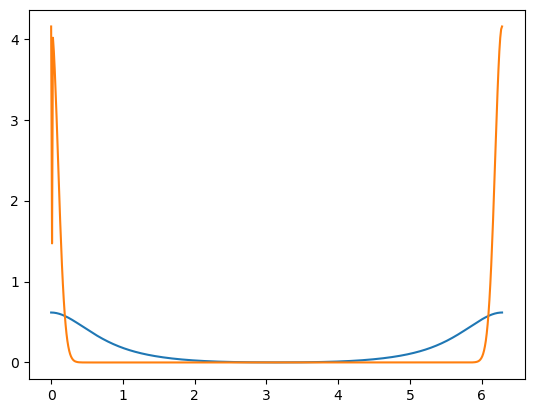

In [17]:
plt.plot(model.stim_ori_grid, p_thetaest_given_theta0[0])
plt.plot(model.stim_ori_grid, p_thetaest_given_theta0_p[0])

# plt.xlim(0, 0.05)

In [9]:
# theta_est = model.expected_thetahat_theta0(theta0, 1e4, 5)
# theta_est_p = model.expected_thetahat_theta0_p(theta0, 1e4, 60)

(0.0, 0.05)

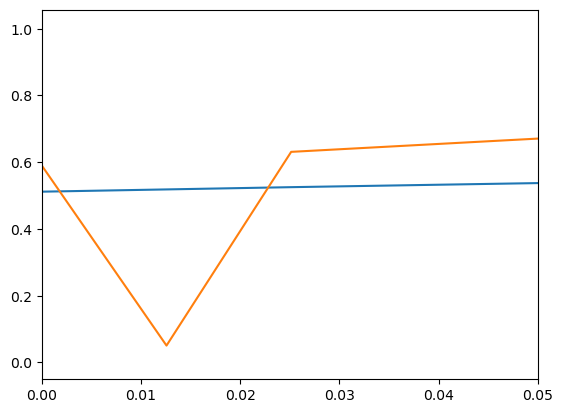

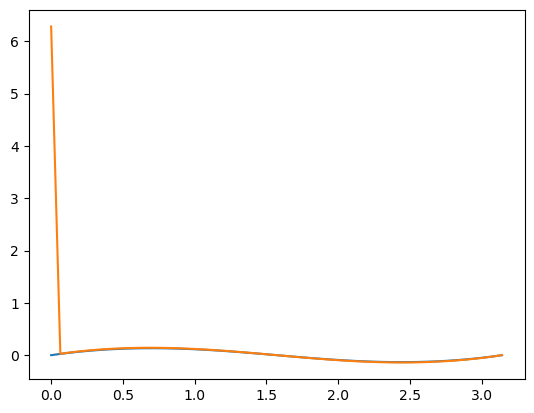

In [17]:
plt.plot(theta0, theta_est-theta0)
plt.plot(theta0, theta_est_p-theta0)

# plt.ylim(-1., 1.)

In [8]:
grad_val = np.abs(np.gradient(thetaest, model.rep_ori_grid))


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
# grad_val = abs(np.gradient(theta_estimates, rep_ori_grid)) #grad_value_ori(x_stim, type, line_frac)
    # ps = p_stim
    # # The last dimension of p which gives probability is stretched for new grid
    # ps[...,:] = ps[...,:]/grad_val

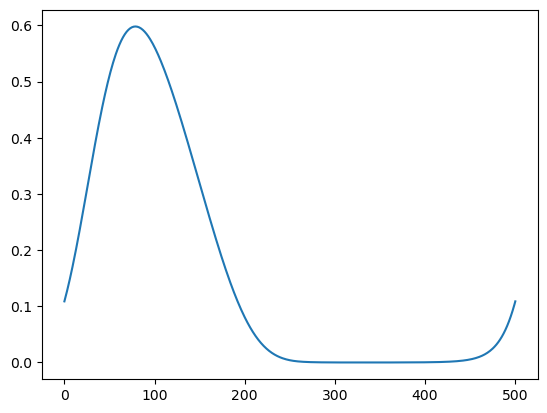

In [13]:
plt.plot(thetaest.T)

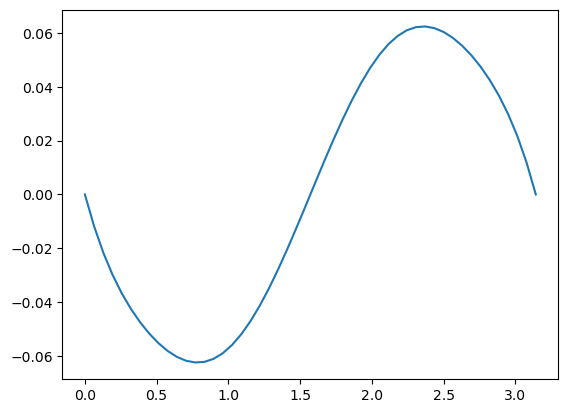

In [20]:
theta_est = model.expected_thetahat_theta0(theta0, 1e4, 16)

plt.plot(theta0, theta0 - theta_est)

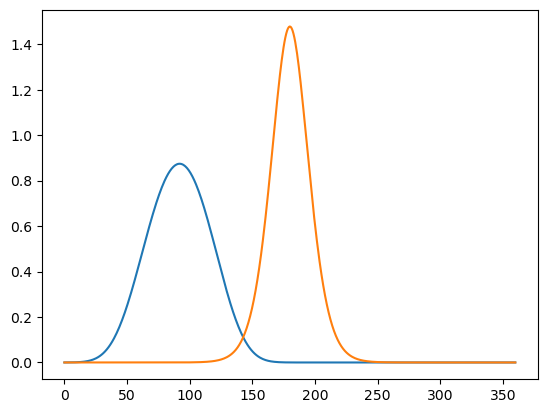

In [18]:
plt.plot(model.stim_ori_grid*180/np.pi, p[25])
plt.plot(model.stim_ori_grid*180/np.pi, p[-1])